# Assignment-4

# Task-1

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

### Extracting Option Chain Data

In [2]:
symbol = "^NIFTY"
stock = yf.Ticker(symbol)
options = stock.options

In [3]:
options

()

In [145]:
expiry = options[5]

In [146]:
opt_chain = stock.option_chain(expiry)
call_options = opt_chain.calls
put_options = opt_chain.puts

In [147]:
(call_options.strike.value_counts()>1).any()

False

In [148]:
(put_options.strike.value_counts()>1).any()

False

In [149]:
call_options = call_options[['contractSymbol','lastTradeDate','strike','lastPrice','openInterest']]
put_options = put_options[['contractSymbol','lastTradeDate','strike','lastPrice','openInterest']]

In [150]:
call_options

,contractSymbol,lastTradeDate,strike,lastPrice,openInterest
0,SPXW240626C04000000,2024-06-13 14:37:10+00:00,4000.0,1419.58,1
1,SPXW240626C04550000,2024-06-07 19:12:34+00:00,4550.0,814.54,1
2,SPXW240626C04650000,2024-05-23 17:16:16+00:00,4650.0,674.87,1
3,SPXW240626C04700000,2024-05-23 17:16:15+00:00,4700.0,625.41,1
4,SPXW240626C04800000,2024-05-17 17:35:35+00:00,4800.0,524.10,5
...,...,...,...,...,...
106,SPXW240626C05800000,2024-06-12 18:33:33+00:00,5800.0,0.35,2
107,SPXW240626C05900000,2024-06-14 19:48:52+00:00,5900.0,0.20,140
108,SPXW240626C06000000,2024-06-13 14:04:29+00:00,6000.0,0.15,26
109,SPXW240626C06200000,2024-05-21 15:14:30+00:00,6200.0,0.09,1


In [151]:
put_options

,contractSymbol,lastTradeDate,strike,lastPrice,openInterest
0,SPXW240626P02400000,2024-05-24 13:38:56+00:00,2400.0,0.10,2
1,SPXW240626P02600000,2024-05-23 16:47:45+00:00,2600.0,0.10,4
2,SPXW240626P02800000,2024-06-05 15:01:03+00:00,2800.0,0.05,1
3,SPXW240626P03000000,2024-05-24 19:34:16+00:00,3000.0,0.17,1
4,SPXW240626P03400000,2024-06-17 18:09:03+00:00,3400.0,0.05,6
...,...,...,...,...,...
126,SPXW240626P05510000,2024-06-18 14:28:55+00:00,5510.0,43.60,6
127,SPXW240626P05520000,2024-06-18 14:28:55+00:00,5520.0,49.90,4
128,SPXW240626P05525000,2024-06-12 19:54:28+00:00,5525.0,98.33,2
129,SPXW240626P05530000,2024-06-18 14:25:52+00:00,5530.0,58.90,1


### Calculating Pain for each Strike Price

In [152]:
strikes = set()
for strike in call_options.strike: strikes.add(strike)
for strike in put_options.strike: strikes.add(strike)    

In [153]:
# strikes

In [154]:
pain = {}
for strike in strikes:
    num = 0
    for index,row in call_options.iterrows():
        if strike>row['strike']: num += row['openInterest'] * (strike - row['strike'])
    for index,row in put_options.iterrows():
        if strike<row['strike']: num += row['openInterest'] * (row['strike'] - strike)
    pain[strike] = num

In [155]:
pain = dict(sorted(pain.items()))

In [156]:
pain

{2400.0: 146460910.0,
 2600.0: 134464910.0,
 2800.0: 122469710.0,
 3000.0: 110474710.0,
 3400.0: 86485110.0,
 3600.0: 74491510.0,
 3800.0: 62527710.0,
 3900.0: 56554510.0,
 4000.0: 50581410.0,
 4100.0: 44618110.0,
 4200.0: 38703910.0,
 4250.0: 35761410.0,
 4300.0: 32858710.0,
 4350.0: 30283510.0,
 4400.0: 27717010.0,
 4450.0: 25604860.0,
 4500.0: 23501760.0,
 4550.0: 21652460.0,
 4600.0: 20116660.0,
 4650.0: 18589110.0,
 4700.0: 17069510.0,
 4750.0: 15555460.0,
 4800.0: 14049110.0,
 4825.0: 13308535.0,
 4850.0: 12571710.0,
 4875.0: 11840135.0,
 4900.0: 11109410.0,
 4925.0: 10394960.0,
 4950.0: 9681910.0,
 4975.0: 8971585.0,
 4980.0: 8830585.0,
 4990.0: 8549125.0,
 5000.0: 8269035.0,
 5010.0: 7992335.0,
 5020.0: 7716275.0,
 5025.0: 7578365.0,
 5030.0: 7440830.0,
 5040.0: 7166860.0,
 5050.0: 6893120.0,
 5060.0: 6622420.0,
 5070.0: 6353490.0,
 5075.0: 6219210.0,
 5080.0: 6085370.0,
 5085.0: 5951705.0,
 5090.0: 5818175.0,
 5095.0: 5684755.0,
 5100.0: 5551405.0,
 5105.0: 5418625.0,
 5110.0:

In [157]:
max_pain_strike = min(pain, key=pain.get)

In [158]:
max_pain_strike

5370.0

### Strategy: Sell Call Option with Strike Price 5% above Max Pain and Put Option with Strike Price 5% below Max Pain

In [159]:
call_price = max_pain_strike * (1.05)
put_price = max_pain_strike * (0.95)

In [160]:
print(call_price, put_price)

5638.5 5101.5


In [161]:
call_contractSymbol = ""
call_strike,call_premium=0,0
for index,row in call_options.iterrows():
    if row['strike']>call_price:
        call_contractSymbol = row['contractSymbol']
        call_strike = row['strike']
        call_premium = row['lastPrice']
        break

In [162]:
put_contractSymbol = ""
put_strike,put_premium=0,0
for index,row in put_options.iterrows():
    if put_options.loc[index+1,'strike']>put_price:
        put_contractSymbol = row['contractSymbol']
        put_strike = row['strike']
        put_premium = row['lastPrice']
        break

In [163]:
print("Call Option:")
print(f"Contract Symbol: {call_contractSymbol}")
print(f"Strike Price: {call_strike}")
print(f"Premium: {call_premium}")
print()
print("Put Option:")
print(f"Contract Symbol: {put_contractSymbol}")
print(f"Strike Price: {put_strike}")
print(f"Premium: {put_premium}")

Call Option:
Contract Symbol: SPXW240626C05650000
Strike Price: 5650.0
Premium: 0.63

Put Option:
Contract Symbol: SPXW240626P05100000
Strike Price: 5100.0
Premium: 0.78


# Task-2

In [164]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing Indices' Historical Data

In [165]:
symbol1 = "^NSEI"
symbol2 = "^BSESN"
stock1 = yf.Ticker(symbol1)
stock2 = yf.Ticker(symbol2)
start = "2023-01-01"
end = "2024-06-17"
nifty_data = stock1.history(start=start, end=end)
sensex_data = stock2.history(start=start, end=end)

In [166]:
nifty_data.reset_index(inplace=True)
sensex_data.reset_index(inplace=True)

In [167]:
nifty_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [168]:
nifty_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-02 00:00:00+05:30,18131.699219,18215.150391,18086.500000,18197.449219,256100,0.0,0.0
1,2023-01-03 00:00:00+05:30,18163.199219,18251.949219,18149.800781,18232.550781,208700,0.0,0.0
2,2023-01-04 00:00:00+05:30,18230.650391,18243.000000,18020.599609,18042.949219,235200,0.0,0.0
3,2023-01-05 00:00:00+05:30,18101.949219,18120.300781,17892.599609,17992.150391,269900,0.0,0.0
4,2023-01-06 00:00:00+05:30,18008.050781,18047.400391,17795.550781,17859.449219,238200,0.0,0.0
...,...,...,...,...,...,...,...,...
351,2024-06-10 00:00:00+05:30,23319.150391,23411.900391,23227.150391,23259.199219,304400,0.0,0.0
352,2024-06-11 00:00:00+05:30,23283.750000,23389.449219,23206.650391,23264.849609,305200,0.0,0.0
353,2024-06-12 00:00:00+05:30,23344.449219,23441.949219,23295.949219,23322.949219,295600,0.0,0.0
354,2024-06-13 00:00:00+05:30,23480.949219,23481.050781,23353.900391,23398.900391,268300,0.0,0.0


In [169]:
sensex_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-02 00:00:00+05:30,60871.238281,61222.789062,60764.628906,61167.789062,18500,0.0,0.0
1,2023-01-03 00:00:00+05:30,61074.878906,61343.960938,61004.039062,61294.199219,6700,0.0,0.0
2,2023-01-04 00:00:00+05:30,61294.648438,61327.210938,60593.558594,60657.449219,7900,0.0,0.0
3,2023-01-05 00:00:00+05:30,60847.500000,60877.058594,60049.839844,60353.269531,8900,0.0,0.0
4,2023-01-06 00:00:00+05:30,60388.738281,60537.628906,59669.910156,59900.371094,8600,0.0,0.0
...,...,...,...,...,...,...,...,...
350,2024-06-10 00:00:00+05:30,76935.406250,77079.039062,76379.726562,76490.078125,17300,0.0,0.0
351,2024-06-11 00:00:00+05:30,76680.898438,76860.531250,76296.437500,76456.593750,6700,0.0,0.0
352,2024-06-12 00:00:00+05:30,76679.109375,77050.531250,76533.781250,76606.570312,9700,0.0,0.0
353,2024-06-13 00:00:00+05:30,77102.046875,77145.460938,76719.703125,76810.898438,7500,0.0,0.0


Text(0, 0.5, 'Nifty Price')

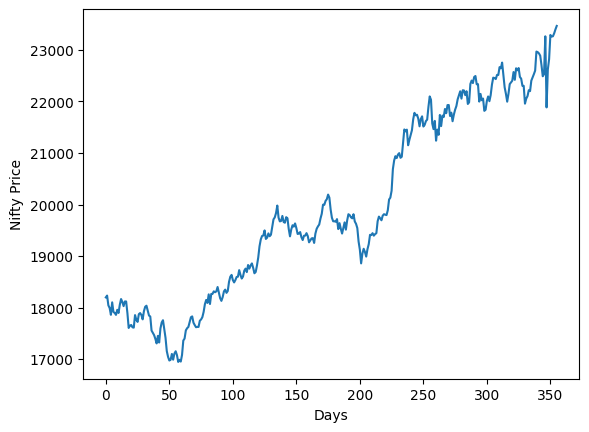

In [170]:
temp = []
for i in range(len(nifty_data)): temp.append(i);
plt.plot(temp, nifty_data.Close)
plt.xlabel("Days")
plt.ylabel("Nifty Price")

Text(0, 0.5, 'Sensex Price')

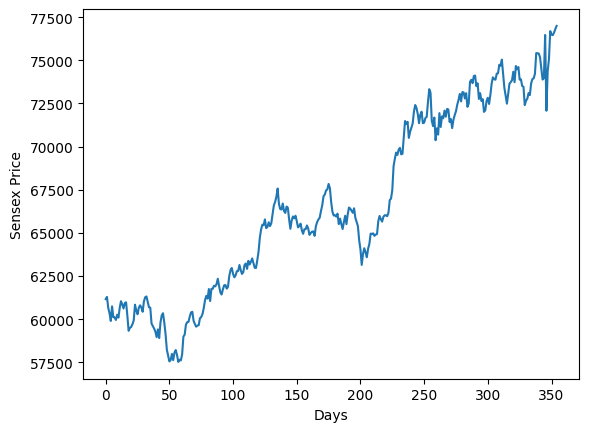

In [171]:
temp = []
for i in range(len(sensex_data)): temp.append(i);
plt.plot(temp, sensex_data.Close)
plt.xlabel("Days")
plt.ylabel("Sensex Price")

### Calculating Daily Returns of the Indices

In [172]:
nifty_data['Returns'] = nifty_data['Close'].pct_change()
sensex_data['Returns'] = sensex_data['Close'].pct_change()

<Axes: xlabel='Returns', ylabel='Count'>

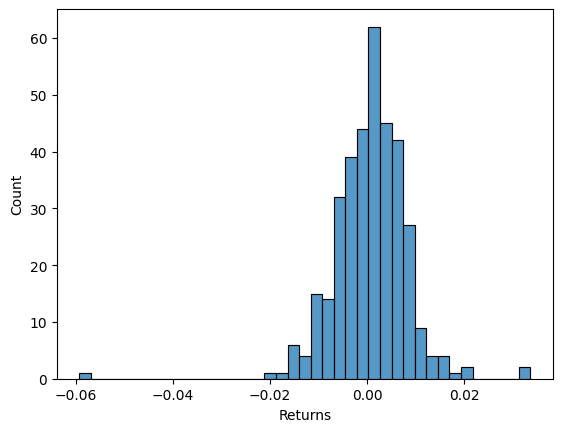

In [173]:
sns.histplot(nifty_data.Returns)

<Axes: xlabel='Returns', ylabel='Count'>

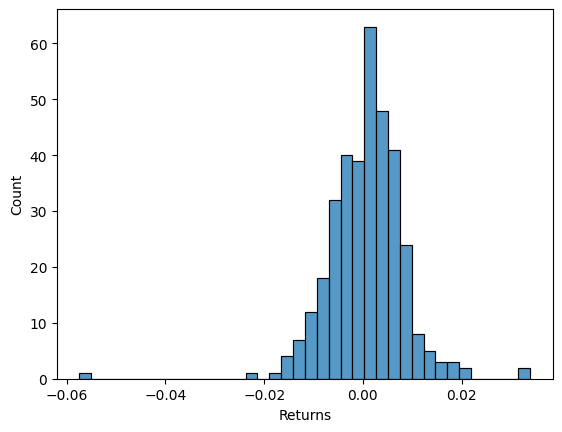

In [174]:
sns.histplot(sensex_data.Returns)

### Calculating Mean and Volatilities

In [175]:
nifty_mean = nifty_data.Returns.mean()
nifty_1st_std = nifty_data.Returns.std()
nifty_2nd_std = 2*nifty_1st_std
sensex_mean = sensex_data.Returns.mean()
sensex_1st_std = sensex_data.Returns.std()
sensex_2nd_std = 2*sensex_1st_std

In [176]:
print(nifty_mean, nifty_1st_std, sensex_mean, sensex_1st_std)

0.0007457904597610533 0.0076500873425828205 0.0006797426058856785 0.00768338786139108


### Calculating Range in which the Indices are likely to trade

#### No. of trading days in 30 days = 21
#### No. of trading days in 3 months = 63
#### No. of trading days in 6 months = 126

In [177]:
# a) 30 days (21 days)
nifty_lower_bound_1st_30days = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*21 - nifty_1st_std*np.sqrt(21)))
nifty_upper_bound_1st_30days = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*21 + nifty_1st_std*np.sqrt(21)))
nifty_lower_bound_2nd_30days = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*21 - nifty_2nd_std*np.sqrt(21)))
nifty_upper_bound_2nd_30days = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*21 + nifty_2nd_std*np.sqrt(21)))

# b) 3 months (63 days)
nifty_lower_bound_1st_3months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*63 - nifty_1st_std*np.sqrt(63)))
nifty_upper_bound_1st_3months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*63 + nifty_1st_std*np.sqrt(63)))
nifty_lower_bound_2nd_3months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*63 - nifty_2nd_std*np.sqrt(63)))
nifty_upper_bound_2nd_3months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*63 + nifty_2nd_std*np.sqrt(63)))

# c) 6 months (126 days)
nifty_lower_bound_1st_6months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*126 - nifty_1st_std*np.sqrt(126)))
nifty_upper_bound_1st_6months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*126 + nifty_1st_std*np.sqrt(126)))
nifty_lower_bound_2nd_6months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*126 - nifty_2nd_std*np.sqrt(126)))
nifty_upper_bound_2nd_6months = nifty_data.loc[len(nifty_data)-1, 'Close'] * (1 + (nifty_mean*126 + nifty_2nd_std*np.sqrt(126)))


In [178]:
# a) 30 days (21 days)
sensex_lower_bound_1st_30days = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*21 - sensex_1st_std*np.sqrt(21)))
sensex_upper_bound_1st_30days = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*21 + sensex_1st_std*np.sqrt(21)))
sensex_lower_bound_2nd_30days = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*21 - sensex_2nd_std*np.sqrt(21)))
sensex_upper_bound_2nd_30days = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*21 + sensex_2nd_std*np.sqrt(21)))

# b) 3 months (63 days)
sensex_lower_bound_1st_3months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*63 - sensex_1st_std*np.sqrt(63)))
sensex_upper_bound_1st_3months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*63 + sensex_1st_std*np.sqrt(63)))
sensex_lower_bound_2nd_3months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*63 - sensex_2nd_std*np.sqrt(63)))
sensex_upper_bound_2nd_3months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*63 + sensex_2nd_std*np.sqrt(63)))

# c) 6 months (126 days)
sensex_lower_bound_1st_6months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*126 - sensex_1st_std*np.sqrt(126)))
sensex_upper_bound_1st_6months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*126 + sensex_1st_std*np.sqrt(126)))
sensex_lower_bound_2nd_6months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*126 - sensex_2nd_std*np.sqrt(126)))
sensex_upper_bound_2nd_6months = sensex_data.loc[len(sensex_data)-1, 'Close'] * (1 + (sensex_mean*126 + sensex_2nd_std*np.sqrt(126)))


In [179]:
print(f"nifty 30 days price 68% confidence interval: [{nifty_lower_bound_1st_30days}, {nifty_upper_bound_1st_30days}] ")
print(f"nifty 30 days price 95% confidence interval: [{nifty_lower_bound_2nd_30days}, {nifty_upper_bound_2nd_30days}] ")
print()

print(f"nifty 3 months price 68% confidence interval: [{nifty_lower_bound_1st_3months}, {nifty_upper_bound_1st_3months}] ")
print(f"nifty 3 months price 95% confidence interval: [{nifty_lower_bound_2nd_3months}, {nifty_upper_bound_2nd_3months}] ")
print()

print(f"nifty 6 months price 68% confidence interval: [{nifty_lower_bound_1st_6months}, {nifty_upper_bound_1st_6months}] ")
print(f"nifty 6 months price 95% confidence interval: [{nifty_lower_bound_2nd_6months}, {nifty_upper_bound_2nd_6months}] ")
print()

nifty 30 days price 68% confidence interval: [23010.47246267432, 24655.744409567957] 
nifty 30 days price 95% confidence interval: [22187.836489227502, 25478.38038301477] 

nifty 3 months price 68% confidence interval: [23143.27878746964, 25992.973391757172] 
nifty 3 months price 95% confidence interval: [21718.431485325873, 27417.820693900943] 

nifty 6 months price 68% confidence interval: [23655.61419084939, 27685.690948854244] 
nifty 6 months price 95% confidence interval: [21640.575811846957, 29700.72932785668] 



In [180]:
print(f"sensex 30 days price 68% confidence interval: [{sensex_lower_bound_1st_30days}, {sensex_upper_bound_1st_30days}] ")
print(f"sensex 30 days price 95% confidence interval: [{sensex_lower_bound_2nd_30days}, {sensex_upper_bound_2nd_30days}] ")
print()

print(f"sensex 3 months price 68% confidence interval: [{sensex_lower_bound_1st_3months}, {sensex_upper_bound_1st_3months}] ")
print(f"sensex 3 months price 95% confidence interval: [{sensex_lower_bound_2nd_3months}, {sensex_upper_bound_2nd_3months}] ")
print()

print(f"sensex 6 months price 68% confidence interval: [{sensex_lower_bound_1st_6months}, {sensex_upper_bound_1st_6months}] ")
print(f"sensex 6 months price 95% confidence interval: [{sensex_lower_bound_2nd_6months}, {sensex_upper_bound_2nd_6months}] ")
print()

sensex 30 days price 68% confidence interval: [75380.92112203385, 80802.70702789858] 
sensex 30 days price 95% confidence interval: [72670.02816910147, 83513.59998083094] 

sensex 3 months price 68% confidence interval: [75594.49102153935, 84985.29967825791] 
sensex 3 months price 95% confidence interval: [70899.08669318006, 89680.7040066172] 

sensex 6 months price 68% confidence interval: [76946.71278030622, 90227.3217442883] 
sensex 6 months price 95% confidence interval: [70306.40829831517, 96867.62622627935] 



### Strategy: Short Strangle

#### Short Strangle is used with the Break-even Points closest to the Lower and Upper Bounds of the 68% Confidence Interval

In [181]:
nifty_lower_bound = nifty_lower_bound_1st_30days
nifty_upper_bound = nifty_upper_bound_1st_30days
sensex_lower_bound = sensex_lower_bound_1st_30days
sensex_upper_bound = sensex_upper_bound_1st_30days

In [182]:
# Short Strangle
# lower_bound = put_strike_price - put_premium - call_premium
# upper_bound = call_strike_price + put_premium + call_premium

# Task-3

In [183]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing Stock's Historical Data

In [184]:
# symbol = "^NSEI"
symbol = input("Enter Stock Symbol: ")
# start_date = "2023-01-01"
start_date = input("Enter start date (yyyy-mm-dd): ")
# end_date = "2024-01-01"
end_date = input("Enter end date (yyyy-mm-dd): ")
# level_of_confidence = 68
level_of_confidence = int(input("Enter the level of confidence for the predicted stock price (without % sign): "))
# num_days = 30
num_days = int(input("For how many days do you want to set the stop-loss levels: "))

Enter Stock Symbol:  ^NSEI
Enter start date (yyyy-mm-dd):  2023-01-01
Enter end date (yyyy-mm-dd):  2024-01-01
Enter the level of confidence for the predicted stock price (without % sign):  68
For how many days do you want to set the stop-loss levels:  30


In [185]:
stock = yf.Ticker(symbol)
data = stock.history(start=start_date, end=end_date)

In [186]:
data.reset_index(inplace=True)

In [187]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-02 00:00:00+05:30,18131.699219,18215.150391,18086.500000,18197.449219,256100,0.0,0.0
1,2023-01-03 00:00:00+05:30,18163.199219,18251.949219,18149.800781,18232.550781,208700,0.0,0.0
2,2023-01-04 00:00:00+05:30,18230.650391,18243.000000,18020.599609,18042.949219,235200,0.0,0.0
3,2023-01-05 00:00:00+05:30,18101.949219,18120.300781,17892.599609,17992.150391,269900,0.0,0.0
4,2023-01-06 00:00:00+05:30,18008.050781,18047.400391,17795.550781,17859.449219,238200,0.0,0.0
...,...,...,...,...,...,...,...,...
240,2023-12-22 00:00:00+05:30,21295.849609,21390.500000,21232.449219,21349.400391,284700,0.0,0.0
241,2023-12-26 00:00:00+05:30,21365.199219,21477.150391,21329.449219,21441.349609,219500,0.0,0.0
242,2023-12-27 00:00:00+05:30,21497.650391,21675.750000,21495.800781,21654.750000,256500,0.0,0.0
243,2023-12-28 00:00:00+05:30,21715.000000,21801.449219,21678.000000,21778.699219,393100,0.0,0.0


Text(0, 0.5, 'Stock Price')

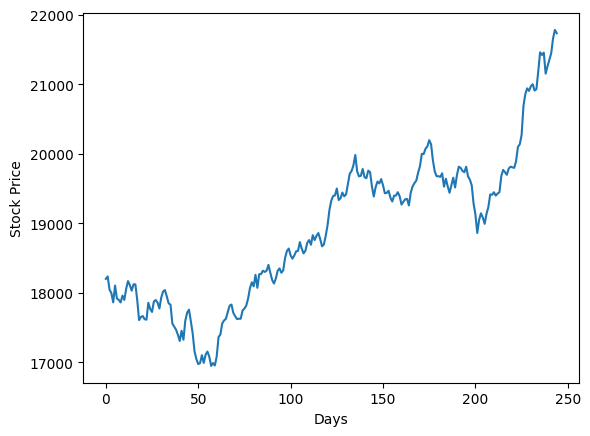

In [188]:
temp = []
for i in range(len(data)): temp.append(i);
plt.plot(temp, data.Close)
plt.xlabel("Days")
plt.ylabel("Stock Price")

### Calculating Daily Returns of the Stock

In [189]:
data['Returns'] = data['Close'].pct_change()
data_mean = data.Returns.mean()
data_std = data.Returns.std()

In [190]:
print(f"mean = {data_mean}")
print(f"standard deviation = {data_std}")

mean = 0.0007467008345380175
standard deviation = 0.006189547507420009


<Axes: xlabel='Returns', ylabel='Count'>

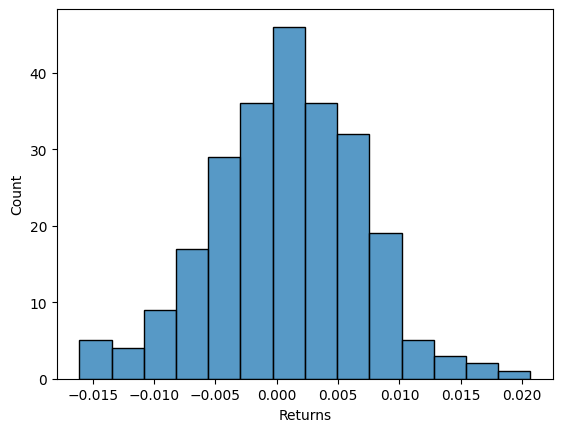

In [191]:
sns.histplot(data.Returns)

### Calculating Stop-loss Prices

In [192]:
import scipy.stats as stats
def z_score(level_of_confidence):
    c = level_of_confidence / 100
    z_score = stats.norm.ppf((1 + c) / 2)
    return z_score

In [194]:
lower_bound = []
for i in range(1,num_days+1):
    lower_bound.append(data['Close'][len(data)-1] * (1 + (data_mean * i - data_std * z_score(level_of_confidence) * np.sqrt(i))))

Text(0, 0.5, 'Stop-loss Price')

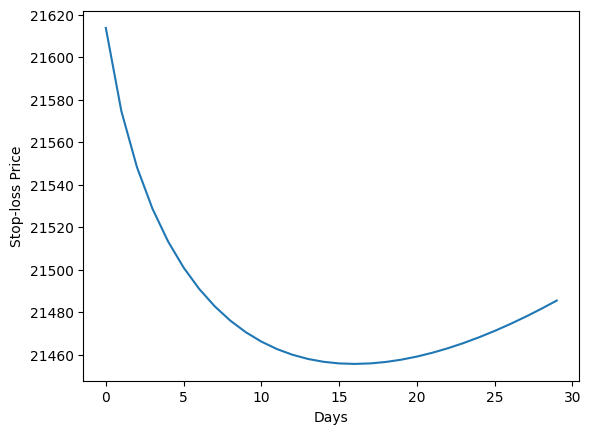

In [195]:
temp = []
for i in range(num_days): temp.append(i)
plt.plot(temp,lower_bound)    
plt.xlabel("Days")
plt.ylabel("Stop-loss Price")

#### Note:- The reason behind the parabolic shape of the graph is the difference in rate of change of f(x)=x and f(x)=sqrt(x). Initially, f(x)=sqrt(x) rises faster than f(x)=x but later f(x)=x rises faster than f(x)=sqrt(x). Thus, the value of (data_mean * i - data_std * z_score(level_of_confidence) * np.sqrt(i)) first decreases then increases as i increases.

In [197]:
# day = 20
day = int(input("Enter the day for which you want the stop-loss price: "))
print(f"Stop-loss price = {lower_bound[1+day]} ")

Enter the day for which you want the stop-loss price:  20


Stop-loss price = 21460.99143461208 


# Task-4

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

### Storing Option Spread Details

In [199]:
print("Enter options details")
num_options = int(input("Enter total number of options: "))
portfolio = pd.DataFrame(columns=['Option Type','Position','Strike Price','Premium'])
for i in range(num_options):
    print()
    print(f"Enter details of Option {i+1}:")
    option_type = input("Enter Option type (call/put): ").lower()
    position = input("Enter the position taken on the option (short/long): ").lower()
    strike = float(input("Enter Option Strike Price: "))
    premium = float(input("Enter Option Premium: "))
    portfolio.loc[i] = [option_type,position,strike,premium]

Enter options details


Enter total number of options:  4



Enter details of Option 1:


Enter Option type (call/put):  call
Enter the position taken on the option (short/long):  short
Enter Option Strike Price:  9000
Enter Option Premium:  94.9



Enter details of Option 2:


Enter Option type (call/put):  call
Enter the position taken on the option (short/long):  short
Enter Option Strike Price:  9000
Enter Option Premium:  94.9



Enter details of Option 3:


Enter Option type (call/put):  call
Enter the position taken on the option (short/long):  long
Enter Option Strike Price:  8900
Enter Option Premium:  146.96



Enter details of Option 4:


Enter Option type (call/put):  call
Enter the position taken on the option (short/long):  long
Enter Option Strike Price:  9100
Enter Option Premium:  55.85


In [200]:
portfolio

,Option Type,Position,Strike Price,Premium
0,call,short,9000.0,94.90
1,call,short,9000.0,94.90
2,call,long,8900.0,146.96
3,call,long,9100.0,55.85


### Calculating Net Profit at the Critical Points (Strike Prices) to Plot the P&L Graph

In [201]:
strikes = list(portfolio['Strike Price'].unique())
strikes.sort()

In [202]:
diff = strikes[-1] - strikes[0]
strikes.insert(0,max(strikes[0]-diff,0))
strikes.append(strikes[-1]+diff)

In [203]:
def net_profit(portfolio, underlying):
    profit = 0
    for index,row in portfolio.iterrows():
        if row['Position']=="long":
            profit -= row['Premium']
            if row['Option Type']=="call": profit += max(0,underlying-row['Strike Price'])
            else: profit += max(0,row['Strike Price']-underlying)    
        else:
            profit += row['Premium']
            if row['Option Type']=="call": profit -= max(0,underlying-row['Strike Price'])
            else: profit -= max(0,row['Strike Price']-underlying)
    return profit            

In [204]:
profits = []
for underlying in strikes: profits.append(net_profit(portfolio,underlying))

In [209]:
profits = [round(value, 2) for value in profits]

In [210]:
profits

[-13.01, -13.01, 86.99, -13.01, -13.01]

### P&L Graph

Text(0, 0.5, 'Net Profit')

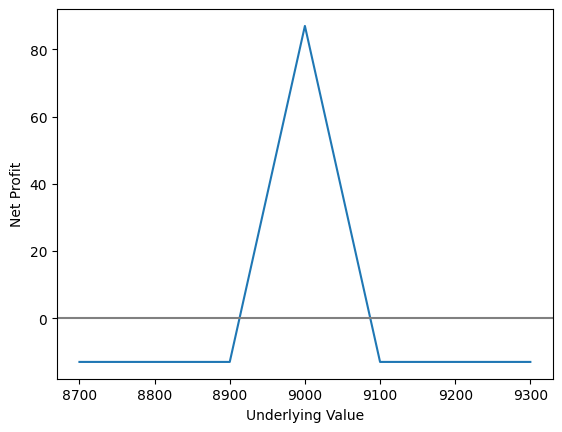

In [211]:
plt.plot(strikes,profits)
if min(profits)<0 and max(profits)>0: plt.axhline(y=0, xmin=0, xmax=1, color='grey')
plt.xlabel("Underlying Value")
plt.ylabel("Net Profit")

### Calculating Max Profit and Max Loss of the Portfolio

In [212]:
max_profit,max_loss=0,0
if profits[0]>profits[1] or profits[-1]>profits[-2]: max_profit = "Unlimited"
else: max_profit = max(profits)
if profits[0]<profits[1] or profits[-1]<profits[-2]: max_loss = "Unlimited"    
else: max_loss = (-1)*min(profits)

In [213]:
print(f"Max Profit = {max_profit} ")
print(f"Max Loss = {max_loss} ")

Max Profit = 86.99 
Max Loss = 13.01 


# Task-5

In [214]:
stock_price = int(input("Enter the stock price: "))
strike_price = int(input("Enter the strike price of the put option: "))
premium = int(input("Enter the premium of the put option: "))

Enter the stock price:  1200
Enter the strike price of the put option:  1000
Enter the premium of the put option:  100


### Function to Calculate Cost of Setting up and Max loss of the Protective Put

In [215]:
def protective_put(stock_price, strike_price, premium):
    cost = premium
    max_loss = stock_price + premium - strike_price
    return cost, max_loss

In [216]:
cost, max_loss = protective_put(stock_price, strike_price, premium)
print(f"Cost of setting up the protective put considering you already own the stock = {cost} ")
print(f"Max Profit (of entire portfolio) = Stock price at expiry - {stock_price + premium} ")
print(f"Max Loss (of entire portfolio) = {max_loss} ")

Cost of setting up the protective put considering you already own the stock = 100 
Max Profit (of entire portfolio) = Stock price at expiry - 1300 
Max Loss (of entire portfolio) = 300 
